# CAB420, Clustering, Example 6: DBScan
Dr Simon Denman (s.denman@qut.edu.au)

## Overview
Our final clustering method is DBScan. Like HAC, this one doesn't need us to specify the number of clusters. Instead we specifya minimum cluster size, and a proximity threshold, and it goes ahead and builds a set of clusters by finding points that are near each other. Nicely, it also considers noise, and so will attempt to filter out isolated points that are like nothing else, rather than trying to fit those into a cluster where they don't really go.

Note that for versions of Matlab before 2019a, there is no DBScan.

## Too Long; Didn't Read
* DBScan is similar to HAC in a number of respects. It doesn't require us to specify the number of clusters, and builds clusters by finding points that are near each other and grouping them
* DBScan will also explicitly model noise- any point that cannot be grouped into a cluster is considered noise
* DBScan uses two parameters, a distance that defines how close two points should be for them to be be considered in the same cluster; and a minimum number of points that defines the minimum number of points that should be in a cluster. As is the case for other clustering metrics, depending on what prior information you have these values may be easy or hard to estimate
* DBScan will struggle to separate clusters where there is a high degree of overlap, but where there is a defined boundary between clusters (even if it's highly non-linear or something such as one cluster containing another) it can work well

In [2]:
import numpy
# for repeatability
numpy.random.SeedSequence(4)
import sklearn
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import math
import hdbscan

## Random Data
You may get a sense of De Ja Vu here, to start we're going to create some data. We'll create two noisy clusters and try split them. Note that I've ensured that these clustes overlap a bit, to make it difficult.

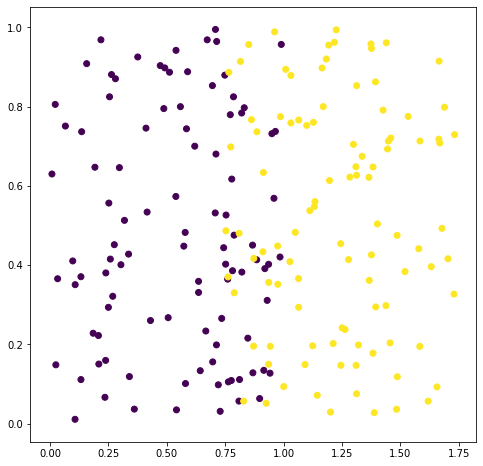

In [9]:
c1 = numpy.random.random((100, 2))
c2 = numpy.random.random((100, 2))
c2[:,0] = c2[:,0]+0.75

X = numpy.concatenate([c1, c2])
Y = numpy.zeros((200))
Y[100:] = 1

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:,0], X[:,1], c=Y)

## DBScan Time

We don't tell DBScan how many clusters are needed. Instead we specify:
* A distance threshold, we we've specified as 1
* The minimum number of points needed to form a cluster, which we've made 5

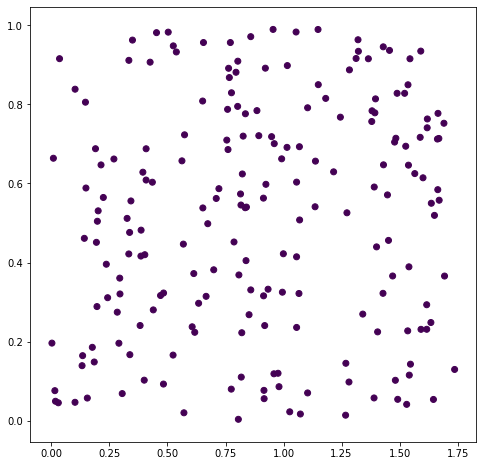

In [4]:
clustering = DBSCAN(eps=1, min_samples=5).fit(X)

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:,0], X[:,1], c=clustering.labels_);

This has lumped everything into the one clusters - not quite the result we were after, but possibly correct in some respects (are these really different clusters?). DBScan is looking for points which have min_samples other points with a distance eps. If we set eps (our distance threshold) to be too big, everything just gets's merged into one cluster.

If we dial eps down, we get the following:

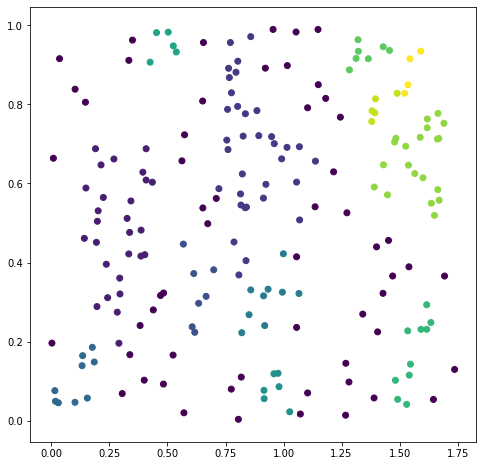

In [5]:
clustering = DBSCAN(eps=0.1, min_samples=5).fit(X)

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:,0], X[:,1], c=clustering.labels_);

Let's have a look at a second example. We'll create two clusters with a severe spatial overlap, such that one contains the other.

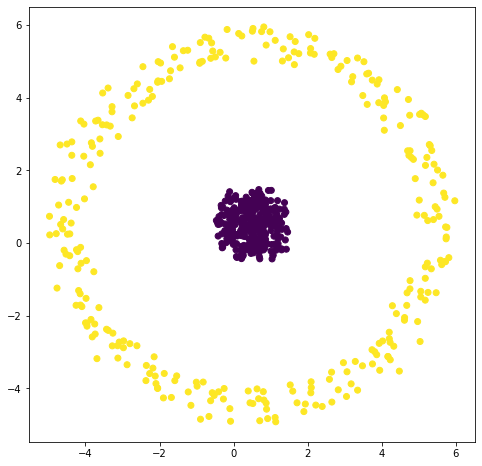

In [8]:
theta = numpy.arange(0, math.pi*2, math.pi*2/300)
theta = numpy.array([numpy.cos(theta), numpy.sin(theta)]).transpose()

c1 = 0.5*theta + numpy.random.random((300,2))
c2 = 5*theta + numpy.random.random((300,2))

X = numpy.concatenate([c1, c2])
Y = numpy.zeros((600))
Y[300:] = 1

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:,0], X[:,1], c=Y);

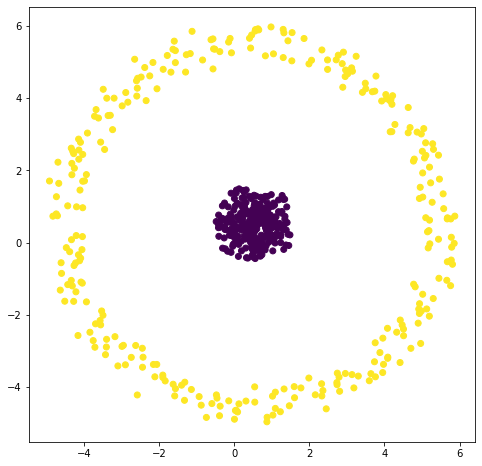

In [7]:
clustering = DBSCAN(eps=1, min_samples=5).fit(X)

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:,0], X[:,1], c=clustering.labels_);

Other methods (in particular K-Means and GMMs) have struggled with this data, but with dbscan, we sepparate the two clusters. This is where dbscan's strengths lie, it can separate the weird clustering boundaries where other methods would fail, and we also don't need to specify the number of clusters.

That said, trying to specify the hyper-parameters (in particular the distance threhold) can be non-trivial.